# Convolution Neural Network for binary image recognition

## dataset obtained from Kaggle at the link:

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

## the dataset is already balanced and divided in:

- train:
    - Normal
    - Pneumonia
- validation:
    - Normal
    - Pneumonia
- test:
    - Normal
    - Pneumonia

### import standard libray for data processing, I/O file and algebra

In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt

## Libraries of Keras and Tensorflow

In [3]:
import tensorflow.keras as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
#two models for transfer learning
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import vgg16
from tensorflow import optimizers

In [4]:
#replace your path to the directory
for dirname, _, filenames in os.walk('/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/.DS_Store
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/.DS_Store
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test/PNEUM

In [5]:
#getting data
labels = ['PNEUMONIA','NORMAL']
img_size = 224#150

def get_training_data(data_dir):
    
    data = []
    
    for label in labels:
        
        path = os.path.join(data_dir , label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            
            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr , (img_size , img_size))
                
                data.append([resized_arr , class_num])
                
            except Exception as e:
                print(e)
                
    return np.array(data)           

### we load data: train, test and validation dataset

In [6]:
#replace your path to the directory
train = get_training_data('/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/train')
test = get_training_data('/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray/test')
val = get_training_data('/Users/mascheroni/Documents/master/secondo/Machine_learning_exam_AFM/ML_exam/petto/chest_xray//val')

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-5-005286a42646>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Text(0.5, 1.0, 'NORMAL')

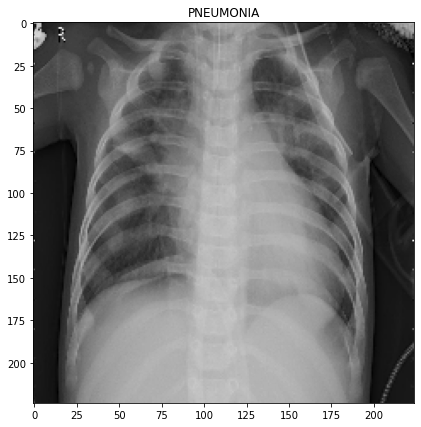

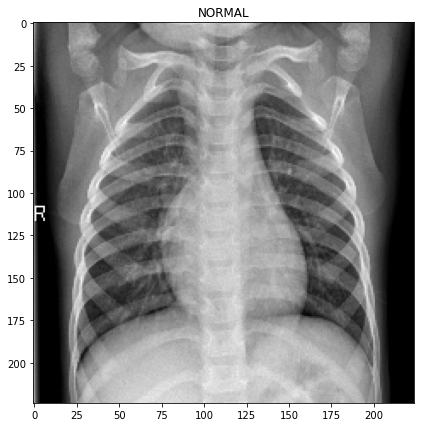

In [7]:
#just some check
plt.figure(figsize = (7,7))
plt.imshow(test[0][0],cmap = 'gray')
plt.title(labels[test[0][1]])

plt.figure(figsize = (7,7))
plt.imshow(train[-1][0],cmap = 'gray')
plt.title(labels[train[-1][1]])

In [8]:
# insert data in array
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature , label in train:
    x_train.append(feature)
    y_train.append(label)

    
for feature,label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature,label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
#dimension of dataset, at teh ebginning the dataset loaded from kaggle was separated innn a different way. I grow validation set bby insertion of data from training set
print('x train = ',len(x_train))
#print('y train = ',len(y_train))
print('x val = ',len(x_val))
#print('x val = ',len(y_val))
print('x test = ',len(x_test))
#print('x test = ',len(y_test))

x train =  5096
x val =  136
x test =  624


In [10]:
#normalize the data
x_train = np.array(x_train)/ 255
x_test = np.array(x_test)/ 255
x_val = np.array(x_val)/ 255

# resize the data 
img_size = 224#150

x_train = x_train.reshape(-1,img_size,img_size,1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1,img_size,img_size,1)
y_test = np.array(y_test)



In [11]:
np.shape(x_train)

(5096, 224, 224, 1)

## Data augmentation

In [12]:
#image data augmentation
#Generate batches of tensor image data with real-time data augmentation.

datagen = ImageDataGenerator(horizontal_flip = True, #Boolean. Randomly flip inputs horizontally.
                             zoom_range = 0.2, # Range for random zoom
                             shear_range = 0.2) # Shear angle in counter-clockwise direction in degrees

datagen.fit(x_train)

In [14]:
'''
Reduce learning rate when a metric has stopped improving.
Models often benefit from reducing the learning rate once learning stagnates. 
This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
'''
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=0,factor=0.1,mode="auto", min_lr=0.01)

## First model

In [130]:
# prova con zfnet
'''
https://towardsdatascience.com/zfnet-an-explanation-of-paper-with-code-f1bd6752121d
'''

model1 = Sequential()
                                   
model1.add(Conv2D(32, (2, 2), activation='relu',input_shape=(150, 150, 1)))
model1.add(MaxPool2D((2,2), strides=2))
model1.add(Conv2D(64, (2, 2), activation='relu',input_shape=(150, 150, 1)))
model1.add(MaxPool2D((2,2), strides=2))
model1.add(Conv2D(128, (2, 2), activation='relu'))
model1.add(Conv2D(256, (2, 2), activation='relu'))
model1.add(MaxPool2D((2,2), strides=2))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Dense(64))
model1.add(Dense(32))
model1.add(Dense(1, activation='relu'))
           

model1.compile(optimizer = 'adadelta' ,loss = 'binary_crossentropy',metrics = ['accuracy'])

In [131]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 149, 149, 32)      160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 73, 73, 64)        8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 35, 35, 128)       32896     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 256)       131328    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 256)     

In [132]:
history1 = model1.fit(datagen.flow(x_train,y_train,batch_size=32),epochs = 20, validation_data = datagen.flow(x_val,y_val),callbacks = [learning_rate_reduction])

Epoch 1/20
160/160 [==============================] - 128s 786ms/step - loss: 0.5521 - accuracy: 0.7525 - val_loss: 0.7421 - val_accuracy: 0.5000
Epoch 2/20
160/160 [==============================] - 117s 729ms/step - loss: 0.5210 - accuracy: 0.7485 - val_loss: 0.7330 - val_accuracy: 0.5000
Epoch 3/20
160/160 [==============================] - 106s 660ms/step - loss: 0.4938 - accuracy: 0.7461 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 4/20
160/160 [==============================] - 106s 662ms/step - loss: 0.4615 - accuracy: 0.7503 - val_loss: 0.7508 - val_accuracy: 0.5000
Epoch 5/20
160/160 [==============================] - 106s 665ms/step - loss: 0.4410 - accuracy: 0.7428 - val_loss: 0.6561 - val_accuracy: 0.5221
Epoch 6/20
160/160 [==============================] - 105s 658ms/step - loss: 0.4110 - accuracy: 0.7646 - val_loss: 0.6317 - val_accuracy: 0.5221
Epoch 7/20
160/160 [==============================] - 106s 662ms/step - loss: 0.3770 - accuracy: 0.7819 - val_loss: 0.5665 -

In [133]:
model1.evaluate(x_test,y_test)

20/20 [==============================] - 4s 160ms/step - loss: 0.3548 - accuracy: 0.8622


[0.35481613874435425, 0.8621794581413269]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


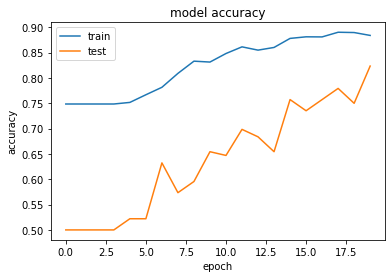

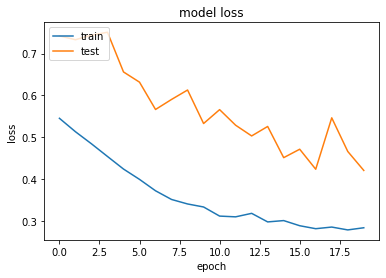

In [134]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Second model

In [147]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), activation = 'relu' ,input_shape=(150,150,1)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64 ,(3,3), activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128 ,(3,3), activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(256 ,(3,3), activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(128,activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(1,activation = 'sigmoid'))


model2.compile(optimizer = 'rmsprop' ,loss = 'binary_crossentropy',metrics = ['accuracy'])

model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
batch_normalization_45 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_46 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 64)      

In [148]:
history2 = model2.fit(datagen.flow(x_train,y_train,batch_size=32),epochs = 20, validation_data = datagen.flow(x_val,y_val),callbacks = [learning_rate_reduction])

Epoch 1/20
160/160 [==============================] - 152s 931ms/step - loss: 1.8864 - accuracy: 0.8173 - val_loss: 32.9837 - val_accuracy: 0.5000
Epoch 2/20
160/160 [==============================] - 145s 905ms/step - loss: 0.2817 - accuracy: 0.9030 - val_loss: 21.6728 - val_accuracy: 0.5000
Epoch 3/20
160/160 [==============================] - 145s 904ms/step - loss: 0.2405 - accuracy: 0.9182 - val_loss: 56.6948 - val_accuracy: 0.5000
Epoch 4/20
160/160 [==============================] - 144s 902ms/step - loss: 0.2447 - accuracy: 0.9211 - val_loss: 1.5413 - val_accuracy: 0.7426
Epoch 5/20
160/160 [==============================] - 146s 914ms/step - loss: 0.1879 - accuracy: 0.9442 - val_loss: 0.8327 - val_accuracy: 0.8750
Epoch 6/20
160/160 [==============================] - 148s 922ms/step - loss: 0.2178 - accuracy: 0.9354 - val_loss: 2.5407 - val_accuracy: 0.6618
Epoch 7/20
160/160 [==============================] - 150s 935ms/step - loss: 0.1649 - accuracy: 0.9460 - val_loss: 4.095

In [149]:
model2.evaluate(x_test,y_test)

20/20 [==============================] - 6s 284ms/step - loss: 14.0814 - accuracy: 0.7500


[14.0814208984375, 0.75]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


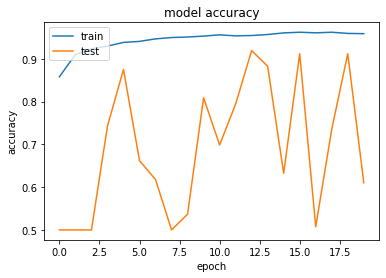

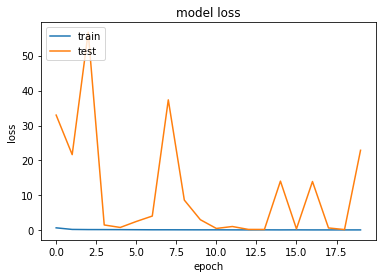

In [151]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#----------------------------------------------------------------------------------------------------------------------#

In [36]:
model4 = tf.models.Sequential([
    tf.layers.Conv2D(filters=64, kernel_size=2, input_shape=[150, 150, 1], padding='same', activation='relu'),
    tf.layers.MaxPooling2D(pool_size=2),
    tf.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    tf.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'),
    tf.layers.MaxPooling2D(pool_size=2),
    tf.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'),
    tf.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'),
    tf.layers.MaxPooling2D(pool_size=2),
    tf.layers.Flatten(),
    tf.layers.Dense(units=128, activation='relu'),
    tf.layers.Dropout(0.5),
    tf.layers.Dense(units=64, activation='relu'),
    tf.layers.Dropout(0.5),
    tf.layers.Dense(units=10, activation='softmax'),
])

In [37]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history4 = model4.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))
score4 = model4.evaluate(x_test, y_test)
print(score4)

Epoch 1/20
163/163 [==============================] - 348s 2s/step - loss: 0.8372 - accuracy: 0.6933 - val_loss: 0.6779 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 344s 2s/step - loss: 0.2626 - accuracy: 0.9109 - val_loss: 0.9739 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 362s 2s/step - loss: 0.1538 - accuracy: 0.9385 - val_loss: 2.5180 - val_accuracy: 0.5625
Epoch 4/20
163/163 [==============================] - 373s 2s/step - loss: 0.1490 - accuracy: 0.9487 - val_loss: 0.5180 - val_accuracy: 0.8750
Epoch 5/20
163/163 [==============================] - 353s 2s/step - loss: 0.0872 - accuracy: 0.9680 - val_loss: 1.2664 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 340s 2s/step - loss: 0.0786 - accuracy: 0.9723 - val_loss: 1.3654 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 337s 2s/step - loss: 0.0689 - accuracy: 0.9815 - val_loss: 0.9733 - val_accuracy: 0.8750

In [38]:
model4.evaluate(x_test,y_test)

20/20 [==============================] - 10s 522ms/step - loss: 4.2770 - accuracy: 0.7404


[4.276993751525879, 0.7403846383094788]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


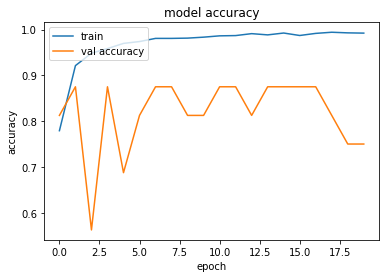

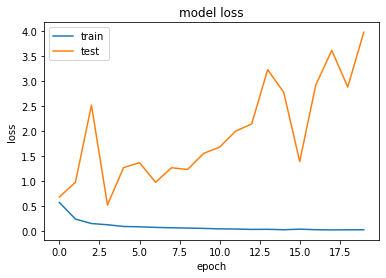

In [154]:
# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#-----------------------------------------------------------------------------------

In [49]:
#example of loading the resnet50 model

num_classes = 2
# load model
resnet_mod = ResNet50(weights= None,include_top= False,  input_shape=(150, 150, 1))

# Freeze all the layers

for layer in resnet_mod.layers[:]:

    layer.trainable = False

for index, layer in enumerate(resnet_mod.layers):
    if index > 150:
        layer.trainable = True

optimizer = tf.optimizers.SGD(learning_rate=0.01)
# Check the trainable status of the individual layers
for layer in resnet_mod.layers:

    print(layer, layer.trainable)



<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff1a912fe80> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ff1a912fbe0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff268d6ba60> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff264bcd6d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff1a7691cd0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ff2676182b0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff2676183d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff32328d7f0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff32328d0d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff1a7fc2310> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff1a7fd7ca0> False
<tensorflow.python.keras.laye

In [50]:
model5 = Sequential()

# Add the ResNNet50 convolutional base model
model5.add(resnet_mod)
# Add new layers
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='relu'))

#model11.add(Dense(10, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters    


In [51]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23581440  
_________________________________________________________________
flatten_5 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                3276864   
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 26,858,954
Trainable params: 12,217,034
Non-trainable params: 14,641,920
_________________________________________________________________


In [55]:
model5.compile(optimizer = 'rmsprop' ,loss = 'binary_crossentropy',metrics = ['accuracy'])

In [56]:
history5 = model5.fit(datagen.flow(x_train,y_train,batch_size=32),epochs = 10, validation_data = datagen.flow(x_val,y_val),callbacks = [learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 288s 2s/step - loss: 4.5025 - accuracy: 0.4237 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 282s 2s/step - loss: 4.4385 - accuracy: 0.4725 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 298s 2s/step - loss: 4.7246 - accuracy: 0.4189 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 284s 2s/step - loss: 4.6635 - accuracy: 0.4901 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 371s 2s/step - loss: 4.4818 - accuracy: 0.5471 - val_loss: 7.7037 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 283s 2s/step - loss: 4.8382 - accuracy: 0.4722 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 283s 2s/step - loss: 4.4199 - accuracy: 0.4992 - val_loss: 7.7125 - val_accuracy: 0.5000

In [57]:
model5.evaluate(x_test,y_test)

20/20 [==============================] - 24s 1s/step - loss: 5.7844 - accuracy: 0.6250


[5.784355640411377, 0.625]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


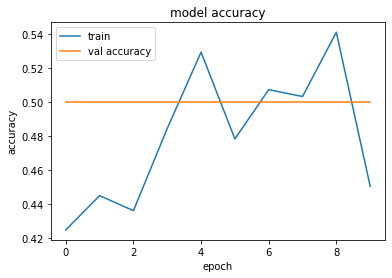

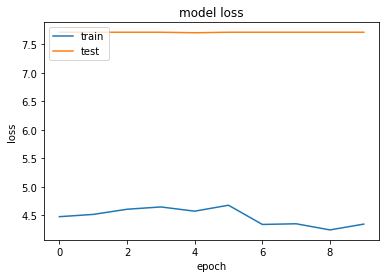

In [159]:
# list all data in history
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# Init the VGG model


In [129]:
num_classes = 2
# load model
# input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False
vgg_conv = vgg16.VGG16(weights = None, include_top=False,input_shape=(img_size, img_size, 1))

# Freeze all the layers

for layer in vgg_conv.layers[:]:

    layer.trainable = False

for index, layer in enumerate(vgg_conv.layers):
    if index > 13:
        layer.trainable = True

optimizer = tf.optimizers.SGD(learning_rate=0.01)
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:

    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fefe8834e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe881a310> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe74d95e0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff1b9a03490> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe881a340> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe881af40> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fefe8822f70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe8822880> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe8822970> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefe79dffd0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fefe79df550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [110]:
# Create the model

model6 = Sequential()

# Add the vgg convolutional base model
model6.add(vgg_conv)
model6.add(BatchNormalization())
# Add new layers
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.1))
model6.add(BatchNormalization())
model6.add(Dense(1, activation='relu'))
# Show a summary of the model. Check the number of trainable parameters

model6.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14713536  
_________________________________________________________________
batch_normalization_26 (Batc (None, 4, 4, 512)         2048      
_________________________________________________________________
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               4194816   
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)             

In [111]:
# Configure the model for training
model6.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])

In [112]:
history6 = model6.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
160/160 [==============================] - 526s 3s/step - loss: 1.6146 - accuracy: 0.7907 - val_loss: 1.5867 - val_accuracy: 0.5000
Epoch 2/20
160/160 [==============================] - 512s 3s/step - loss: 1.0041 - accuracy: 0.8446 - val_loss: 0.9934 - val_accuracy: 0.5000
Epoch 3/20
160/160 [==============================] - 517s 3s/step - loss: 1.1463 - accuracy: 0.8484 - val_loss: 0.5929 - val_accuracy: 0.5809
Epoch 4/20
160/160 [==============================] - 512s 3s/step - loss: 0.8954 - accuracy: 0.8668 - val_loss: 1.0638 - val_accuracy: 0.8309
Epoch 5/20
160/160 [==============================] - 533s 3s/step - loss: 0.9207 - accuracy: 0.8731 - val_loss: 1.1670 - val_accuracy: 0.8382
Epoch 6/20
160/160 [==============================] - 6876s 43s/step - loss: 0.8279 - accuracy: 0.8795 - val_loss: 1.5542 - val_accuracy: 0.8235
Epoch 7/20
160/160 [==============================] - 519s 3s/step - loss: 0.6983 - accuracy: 0.8930 - val_loss: 1.1515 - val_accuracy: 0.77

In [219]:
model6.evaluate(x_test,y_test)

20/20 [==============================] - 56s 3s/step - loss: 0.4523 - accuracy: 0.9196


[1.2408212423324585, 0.8157051205635071]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


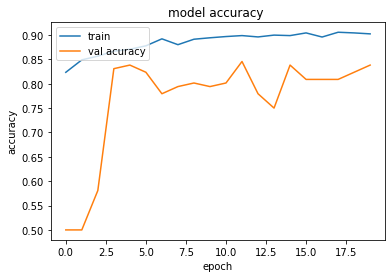

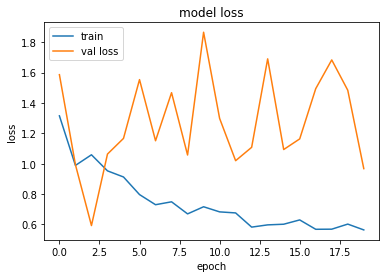

In [220]:
model6.evaluate(x_test,y_test)
# list all data in history
print(history6.history.keys())
# summarize history for accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
#plt.plot(history6.history['loss'])
#plt.plot(history6.history['val_loss'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val acuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val loss'], loc='upper left')
plt.show()

In [155]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [160]:
import cv2

import os,glob

from os import listdir,makedirs

from os.path import isfile,join

In [190]:
from tensorflow import image

In [191]:
name='NORMAL2-IM-1423-0001'

In [ ]:
# Merge channels to create color image (3 channels)
gray_three = cv2.merge([gray,gray,gray])

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input 
IMG_SIZE = 224
vgg_layer = vgg16.VGG16(weights='imagenet',include_top= 'TRUE') 

input_tensor = Input(shape=(IMG_SIZE,IMG_SIZE,1) )
x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (IMG_SIZE,IMG_SIZE,3)

In [21]:
out = vgg_layer (x) 

model8 = Model(inputs=input_tensor,outputs=out)
# Configure the model for training
model8.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])

In [22]:
model8.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 3)       30        
_________________________________________________________________
vgg16 (Functional)           (None, 1000)              138357544 
Total params: 138,357,574
Trainable params: 130,722,310
Non-trainable params: 7,635,264
_________________________________________________________________


In [23]:
history8 = model8.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


ValueError: in user code:

    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/envs/CSML21_NEW/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 1000) vs (None, 1))


In [16]:
num_classes = 2
#IMAGE_SIZE = [150,150]
# load model
# input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False
#vgg_conv2 = vgg16.VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Freeze all the layers

for layer in vgg_layer.layers[:]:

    layer.trainable = False

for index, layer in enumerate(vgg_layer.layers):
    if index > 13:
        layer.trainable = True

optimizer = tf.optimizers.SGD(learning_rate=0.01)
# Check the trainable status of the individual layers
for layer in vgg_layer.layers:

    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fde42ed9160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde419a19a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d46fb50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde419a1e20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d4b25b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d4b8310> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdd2d4b8730> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d4bebe0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d4c4790> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdd2d4c8af0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdd2d4b8c10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [17]:
# Create the model

model9 = Sequential()

# Add the vgg convolutional base model
model9.add(model8)
model9.add(BatchNormalization())
# Add new layers
model9.add(Flatten())
model9.add(Dense(512, activation='relu'))
model9.add(BatchNormalization())
model9.add(Dropout(0.1))
model9.add(BatchNormalization())
model9.add(Dense(1, activation='relu'))
# Show a summary of the model. Check the number of trainable parameters

model9.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 1000)              138357574 
_________________________________________________________________
batch_normalization (BatchNo (None, 1000)              4000      
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2

In [24]:
# Configure the model for training
model9.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])

In [25]:
history9 = model9.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
160/160 [==============================] - 2952s 18s/step - loss: 1.2537 - accuracy: 0.8876 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/3
160/160 [==============================] - 2960s 18s/step - loss: 0.5836 - accuracy: 0.9427 - val_loss: 4.4592 - val_accuracy: 0.5000
Epoch 3/3
160/160 [==============================] - 2852s 18s/step - loss: 0.4323 - accuracy: 0.9624 - val_loss: 0.5493 - val_accuracy: 0.5294


In [ ]:
model9.evaluate(x_test,y_test)
# list all data in history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


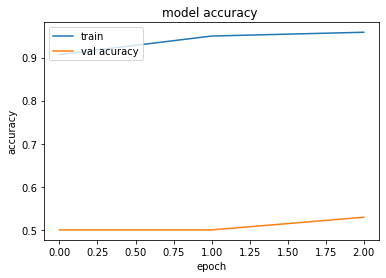

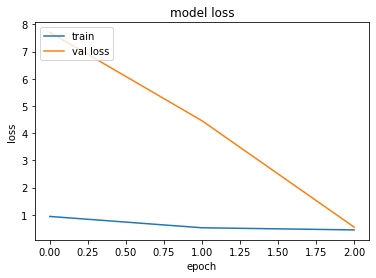

In [29]:
print(history9.history.keys())
# summarize history for accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
#plt.plot(history6.history['loss'])
#plt.plot(history6.history['val_loss'])
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val acuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val loss'], loc='upper left')
plt.show()